In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In this notebook, we explore whether a Logistc Regression model can predict the publisher where a given article text was published. We find the model achieves 71% top-1 accuracy in the test set. Manually entering text in "text = ..." helps visualize the model.

## Load data

In [2]:
df = pd.read_csv("../data/source/newsclust.csv")

## Train-test split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
X = df['text'].values
y = df['site'].values

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Build a pipeline

In [6]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.pipeline import Pipeline

In [7]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [8]:
%time pipeline.fit(X_train, y_train)

CPU times: user 8min 43s, sys: 568 ms, total: 8min 43s
Wall time: 8min 43s


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [9]:
best_clf = pipeline
print(classification_report(y_test, best_clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.73      0.20      0.31       306
          1       0.78      0.95      0.86       621
          2       0.79      0.91      0.85       668
          3       0.63      0.28      0.38       246
          4       0.88      0.63      0.73       473
          5       0.82      0.78      0.80       618
          6       0.58      0.59      0.59       632
          7       0.78      0.83      0.81       695
          8       0.63      0.53      0.57       608
          9       0.99      0.96      0.97       375
         10       0.55      0.70      0.61       666
         11       0.68      0.73      0.70       663
         12       0.78      0.64      0.70       625
         13       0.85      0.66      0.74       630
         14       0.00      0.00      0.00        12
         15       0.79      0.67      0.72       618
         16       0.64      0.50      0.57       646
         17       0.59      0.54      0.56   

/home/ubuntu/pytorch/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
k = 1000

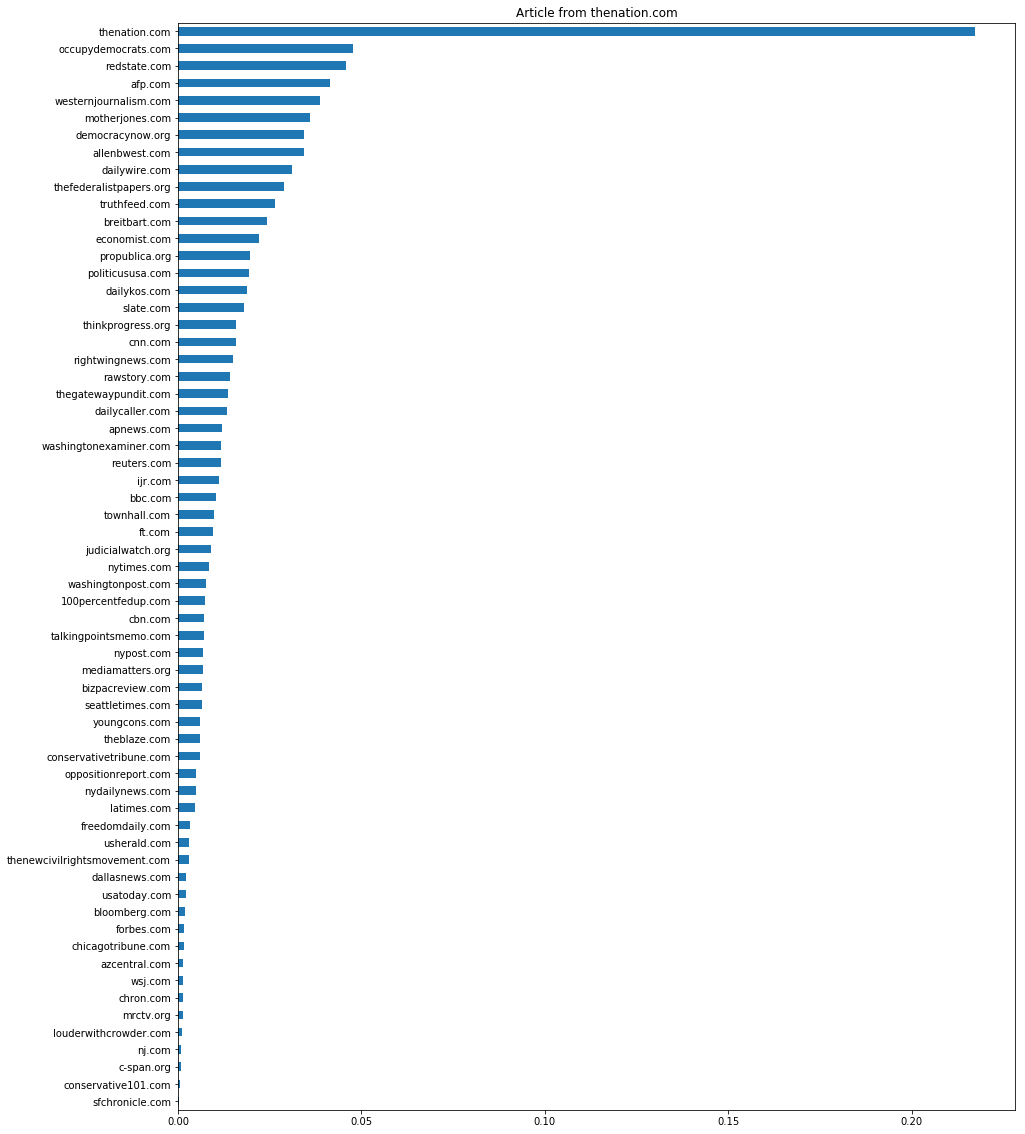

In [11]:
res = pd.DataFrame(pipeline.predict_proba([X_test[k]]), columns=encoder.classes_).T.sort_values(by=0)
res.plot(kind='barh', figsize=(15, 20), title="Article from %s" % encoder.inverse_transform(y_test[k]), legend=None)

In [12]:
text = """
NEW YORK CITY — Rumored 2020 presidential hopeful and New York Gov. Andrew Cuomo catered to his party’s left-wing base Wednesday when he called for the removal of Confederate names and busts from the Big Apple.
Instead of calling for calm as left-wing radicals across the U.S. look to strip the country of various historical artifacts in the wake of the violence in Charlottesville, Virginia, Gov. Cuomo is instead stoking the flames of iconoclasm.

Cuomo announced Wednesday that he had asked the acting secretary of the U.S. Army to remove confederate names from the streets near Fort Hamilton Military Base in Brooklyn.

 Follow
Andrew Cuomo ✔ @NYGovCuomo
I just asked the acting secretary of the @USArmy to remove confederate names from the streets of Fort Hamilton in Brooklyn.
3:41 AM - Aug 17, 2017
 1,000 1,000 Replies   952 952 Retweets   3,603 3,603 likes
Twitter Ads info and privacy
He later announced that sculptures of two confederate generals — Stonewall Jackson and Robert E. Lee — would be removed from the City University of New York’s (CUNY) hall of great Americans purportedly “because New York stands against racism.”

17 Aug
Andrew Cuomo  ✔ @NYGovCuomo
Robert E. Lee and Stonewall Jackson will be removed from the CUNY hall of great Americans because New York stands against racism.
 Follow
Andrew Cuomo ✔ @NYGovCuomo
There are many great Americans, many of them New Yorkers worthy of a spot in this great hall. These two confederates are not among them.
8:24 AM - Aug 17, 2017
 528 528 Replies   627 627 Retweets   2,980 2,980 likes
Twitter Ads info and privacy
Cuomo’s move was particularly curious as New York is not known for being a hot bed of Confederacy. Even the New York Times noted that New York, “a Northern stronghold of Unionists and abolitionists, has few Confederate memorials.”

The move came as two plaques honoring Lee were removed from a Brooklyn park. The New York Daily News reported that the plaque from 1912 was removed from a tree planted by Lee in the 1840s, years before the outbreak of the Civil War.

Lee served at Fort Hamilton during those years, and the tree is now outside an Episcopal Church. A second plaque installed in 1935 was also removed.

“For us, it wasn’t a decision that needed more than a minute of thought,” Bishop Lawrence Provenzano of the Episcopal Diocese of Long Island, told the Daily News.

Not all local residents were happy:

“What’s next?” local resident Tony Eye told the Daily News. “If someone doesn’t like the color of that guy’s door, you’re going to take it down? If it was red, and someone related that to communism, they have to take it down because it’s a red door?”

The purge looks like it is far from over, however, with Democratic Mayor Bill de Blasio announcing Wednesday that, in the wake of Charlottesville, “New York City will conduct a 90-day review of all symbols of hate on city property.”
"""

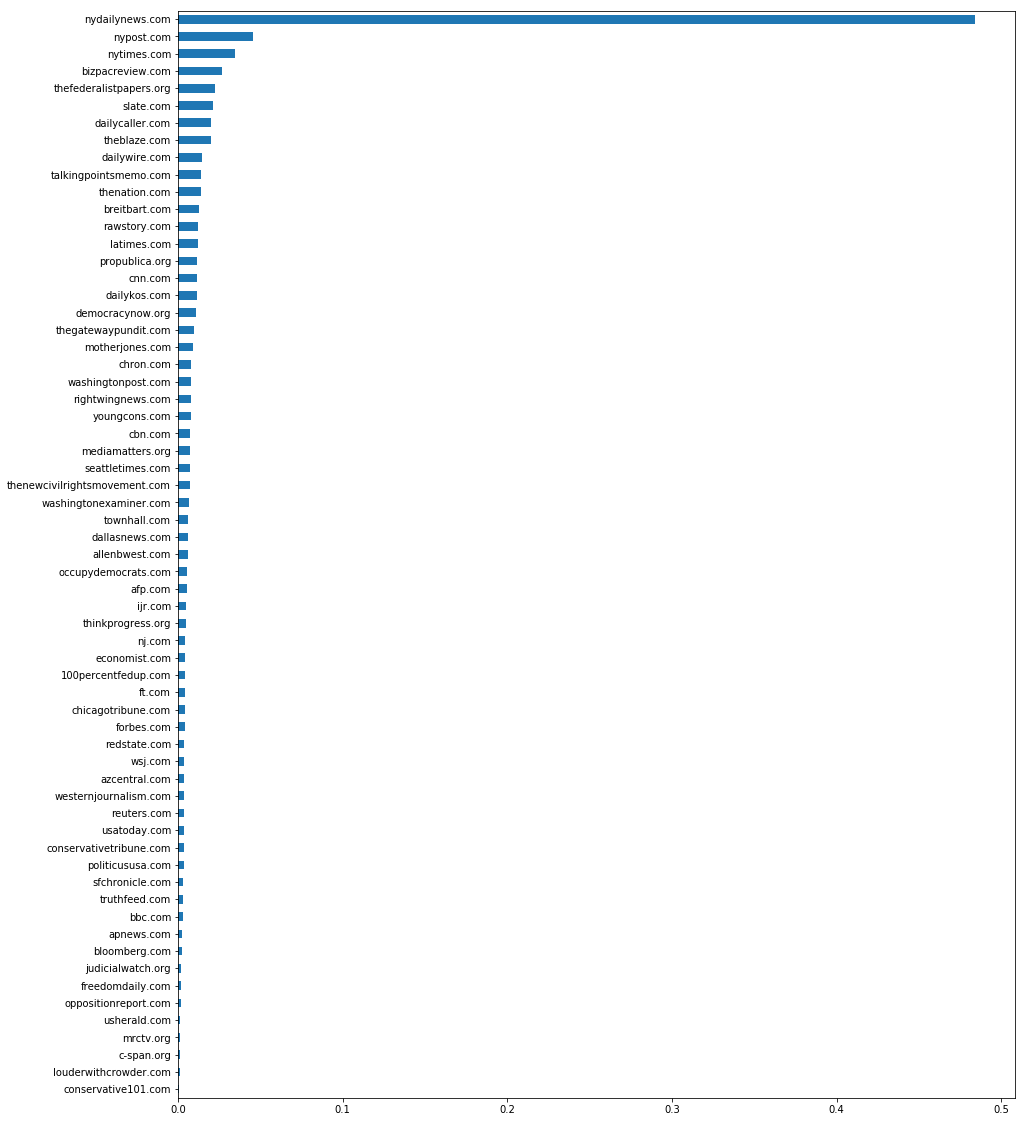

In [13]:
res = pd.DataFrame(pipeline.predict_proba([text]), columns=encoder.classes_).T.sort_values(by=0)
res.plot(kind='barh', figsize=(15, 20), legend=None)
plt.show()